In [1]:
cd ../ThinkStats2-master/code

/home/weizhao/shared_folder/ds_self_learning/data_science/Metis/metisgh/prework/ThinkStats2-master/code


In [57]:
import numpy as np
import pandas as pd
import scipy as sp
import nsfg
import matplotlib.pyplot as plt
import first
import thinkstats2
import thinkplot
import math
import estimation as est

In [34]:
lam = 2
n = 10
L = []
x_bar = []
for _ in range(1000):
    sample = np.random.exponential(1/lam, n)
    L.append(1/np.mean(sample))
    x_bar.append(np.mean(sample))


1.2565521204676704
3.607500525528136


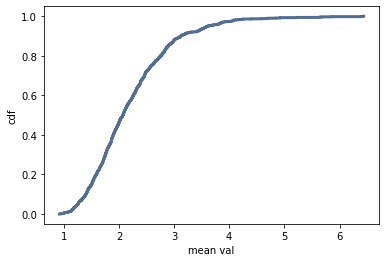

In [65]:
cdf = thinkstats2.Cdf(L)
ci1 = cdf.Percentile(5)
ci2 = cdf.Percentile(95)

print(ci1)
print(ci2)

thinkplot.Cdfs([cdf])
thinkplot.Config(xlabel='mean val',
                 ylabel='cdf',
                 legend=False)

In [69]:
def Estimate3(n=10, m=1000):
    lam = 2
    means = []
    medians = []
    rmse = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
    rmse = est.RMSE(means, lam)
#     print('rmse L', est.RMSE(means, lam))
#     print('rmse Lm', est.RMSE(medians, lam))
#     print('mean error L', est.MeanError(means, lam))
#     print('mean error Lm', est.MeanError(medians, lam))
    return rmse
    
Estimate3()

0.7122832615740975

In [73]:
rmses = []
for i in range(5, 100, 1):
    rmses.append(Estimate3(n=i, m=1000))
    

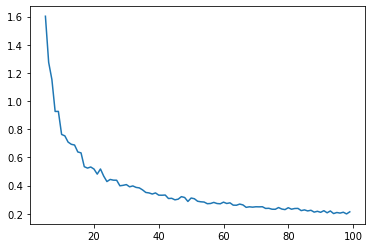

In [74]:
#larger sample size led to smaller rmse
plt.plot(range(5, 100, 1), rmses)